In [2]:
# Import libraries
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

%matplotlib inline

In [3]:
# Load data

# Load credits.csv
credits = pd.read_csv('./raw-data/credits.csv')

# Load keywords.csv
keywords = pd.read_csv('./raw-data/keywords.csv')

# Load links.csv
links = pd.read_csv('./raw-data/links.csv')

# Load movies_metadata.csv
movies_metadata = pd.read_csv('./raw-data/movies_metadata.csv', low_memory=False)

# Load ratings.csv
ratings = pd.read_csv('./raw-data/ratings.csv')

In [4]:
# JSON to Pandas DataFrames

# Function to safely parse JSON-like strings
def parse_json_column(df, column_name):
    def parse_json(x):
        if pd.isna(x):
            return []
        try:
            return ast.literal_eval(x)
        except:
            return []
    df[column_name] = df[column_name].apply(parse_json)
    return df

# Function to flatten list of dictionaries into a DataFrame
def flatten_column(df, column_name):
    flattened_data = df[column_name].apply(pd.Series).stack().reset_index(level=1, drop=True)
    flattened_df = pd.DataFrame(list(flattened_data))
    return flattened_df

# credits.csv dp

In [5]:
# Credits dataset processing
credits = parse_json_column(credits, 'cast')
credits = parse_json_column(credits, 'crew')

In [6]:
# Define credits-specific functions

def extract_cast_genders(cast_list):
    genders = []
    for member in cast_list:
        gender = member.get('gender', None)
        # Ensure gender is valid (0, 1, 2)
        if gender in [0, 1, 2]:
            genders.append(gender)
    return genders

# Function to extract genders, departments, and jobs from crew list
def extract_crew_info(crew_list):
    genders = []
    departments = []
    jobs = []
    for member in crew_list:
        # Extract gender
        gender = member.get('gender', None)
        if gender in [0, 1, 2]:
            genders.append(gender)
        # Extract department
        department = member.get('department', None)
        if department:
            departments.append(department)
        # Extract job
        job = member.get('job', None)
        if job:
            jobs.append(job)
    return genders, departments, jobs

In [7]:
# Apply the function to the 'cast' column
credits['cast_genders'] = credits['cast'].apply(extract_cast_genders)

# Flatten the list of genders
all_cast_genders = [gender for genders in credits['cast_genders'] for gender in genders]

# Create a Counter object to count genders
cast_gender_counts = Counter(all_cast_genders)

# Map gender codes to labels
gender_labels = {0: 'Not specified', 1: 'Female', 2: 'Male'}

# Convert counts to a DataFrame for better display
cast_gender_df = pd.DataFrame.from_dict(cast_gender_counts, orient='index', columns=['Count'])
cast_gender_df.index = cast_gender_df.index.map(gender_labels)
cast_gender_df.reset_index(inplace=True)
cast_gender_df.rename(columns={'index': 'Gender'}, inplace=True)

print("Number of Cast Members per Gender:")
display(cast_gender_df)

Number of Cast Members per Gender:


,Gender,Count
0,Male,226713
1,Female,111797
2,Not specified,223964


In [8]:
# Apply the function to the 'crew' column
crew_info = credits['crew'].apply(extract_crew_info)

# Create separate columns for genders, departments, and jobs
credits['crew_genders'] = crew_info.apply(lambda x: x[0])
credits['crew_departments'] = crew_info.apply(lambda x: x[1])
credits['crew_jobs'] = crew_info.apply(lambda x: x[2])

In [9]:
# Flatten the list of genders
all_crew_genders = [gender for genders in credits['crew_genders'] for gender in genders]

# Create a Counter object to count genders
crew_gender_counts = Counter(all_crew_genders)

# Convert counts to a DataFrame
crew_gender_df = pd.DataFrame.from_dict(crew_gender_counts, orient='index', columns=['Count'])
crew_gender_df.index = crew_gender_df.index.map(gender_labels)
crew_gender_df.reset_index(inplace=True)
crew_gender_df.rename(columns={'index': 'Gender'}, inplace=True)

print("Number of Crew Members per Gender:")
display(crew_gender_df)

Number of Crew Members per Gender:


,Gender,Count
0,Male,160872
1,Not specified,272319
2,Female,31123


In [10]:
# Flatten the list of departments
all_crew_departments = [dept for departments in credits['crew_departments'] for dept in departments]

# Create a Counter object to count departments
crew_department_counts = Counter(all_crew_departments)

# Convert counts to a DataFrame
crew_department_df = pd.DataFrame.from_dict(crew_department_counts, orient='index', columns=['Count'])
crew_department_df.reset_index(inplace=True)
crew_department_df.rename(columns={'index': 'Department'}, inplace=True)

# Sort the DataFrame by count
crew_department_df.sort_values(by='Count', ascending=False, inplace=True)

print("Number of Crew Members per Department:")
display(crew_department_df)

Number of Crew Members per Department:


,Department,Count
2,Production,94498
1,Writing,74831
0,Directing,58134
5,Sound,50605
4,Art,40694
9,Camera,33539
7,Crew,31605
10,Costume & Make-Up,30850
3,Editing,29831
6,Visual Effects,14861


In [11]:
# Flatten the list of jobs
all_crew_jobs = [job for jobs in credits['crew_jobs'] for job in jobs]

# Create a Counter object to count jobs
crew_job_counts = Counter(all_crew_jobs)

# Convert counts to a DataFrame
crew_job_df = pd.DataFrame.from_dict(crew_job_counts, orient='index', columns=['Count'])
crew_job_df.reset_index(inplace=True)
crew_job_df.rename(columns={'index': 'Job'}, inplace=True)

# Sort the DataFrame by count
crew_job_df.sort_values(by='Count', ascending=False, inplace=True)

print("Number of Crew Members per Job (Top 20):")
display(crew_job_df.head(20))

Number of Crew Members per Job (Top 20):


,Job,Count
0,Director,49048
2,Producer,43555
51,Writer,30431
1,Screenplay,25163
4,Editor,23800
48,Director of Photography,20659
3,Executive Producer,18866
44,Original Music Composer,15790
45,Casting,12635
5,Art Direction,11689


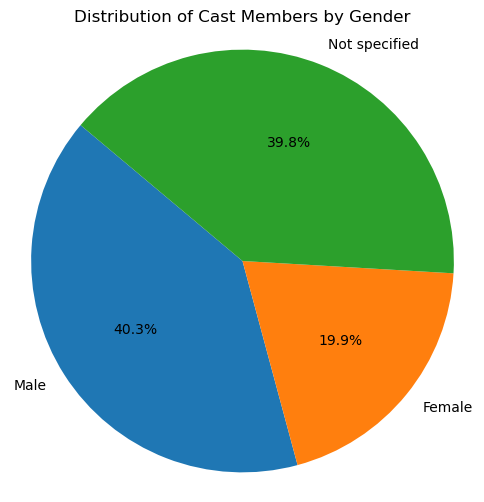

In [12]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Plot a pie chart
plt.figure(figsize=(6,6))
plt.pie(cast_gender_df['Count'], labels=cast_gender_df['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cast Members by Gender')
plt.axis('equal')
plt.show()

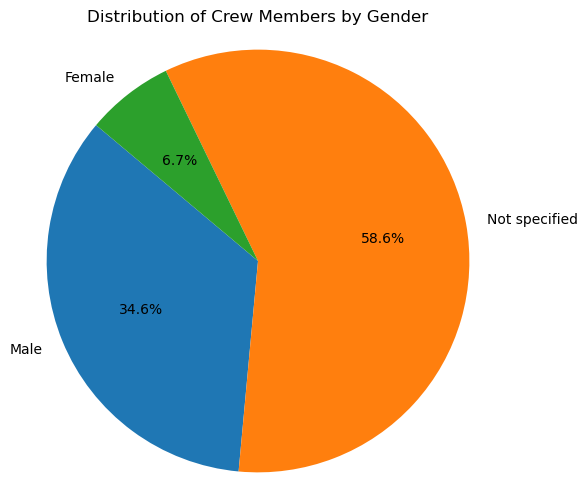

In [13]:
# Plot a pie chart
plt.figure(figsize=(6,6))
plt.pie(crew_gender_df['Count'], labels=crew_gender_df['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crew Members by Gender')
plt.axis('equal')
plt.show()

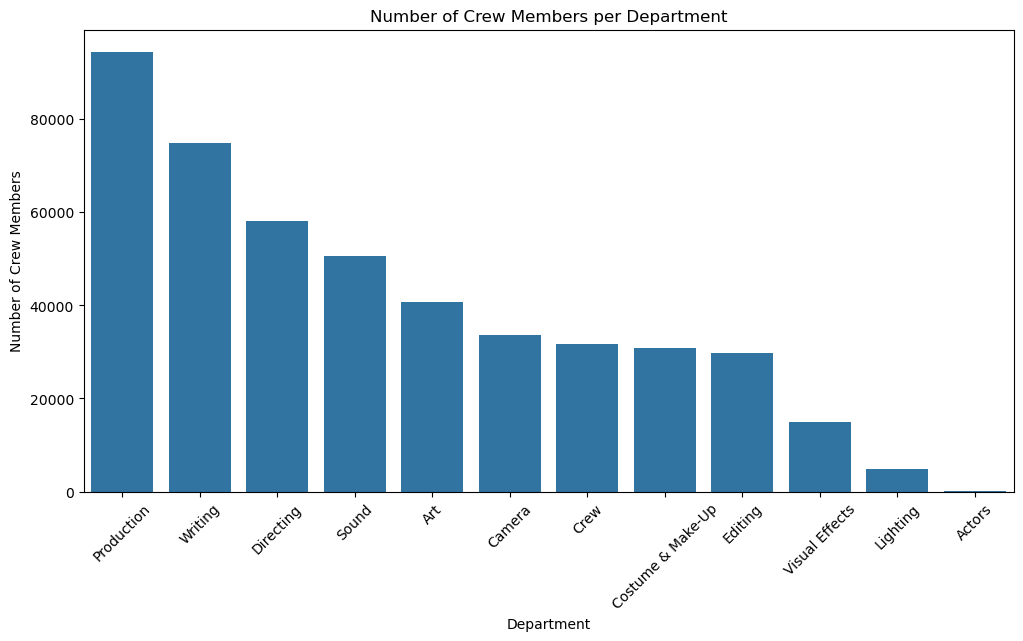

In [14]:
# Plot a bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=crew_department_df, x='Department', y='Count')
plt.title('Number of Crew Members per Department')
plt.xlabel('Department')
plt.ylabel('Number of Crew Members')
plt.xticks(rotation=45)
plt.show()

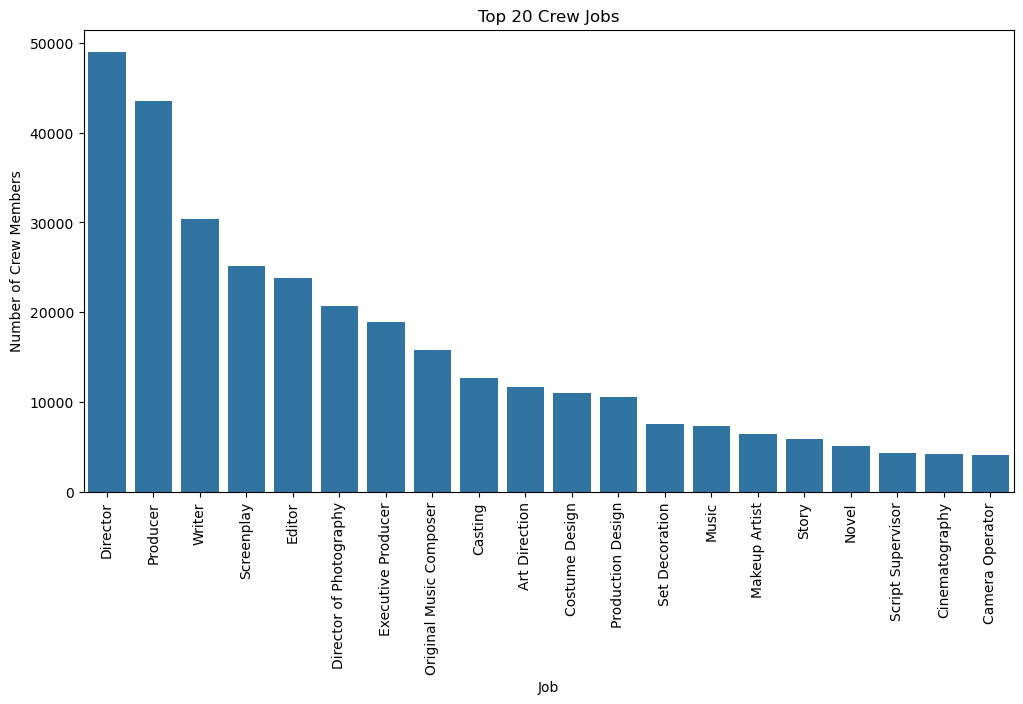

In [15]:
# Plot a bar chart for top 20 jobs
plt.figure(figsize=(12,6))
sns.barplot(data=crew_job_df.head(20), x='Job', y='Count')
plt.title('Top 20 Crew Jobs')
plt.xlabel('Job')
plt.ylabel('Number of Crew Members')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Create new parsed DataFrame

# Lists to store data for each movie
movie_ids = []
num_cast_gender_0 = []
num_cast_gender_1 = []
num_cast_gender_2 = []
num_crew_gender_0 = []
num_crew_gender_1 = []
num_crew_gender_2 = []
crew_department_counts_list = []
crew_job_counts_list = []

# Iterate over each row in the credits DataFrame
for index, row in credits.iterrows():
    movie_id = row['id']
    movie_ids.append(movie_id)
    
    # Process cast
    cast_list = row['cast']
    cast_genders = [member.get('gender', 0) for member in cast_list if member.get('gender') in [0, 1, 2]]
    cast_gender_counts = Counter(cast_genders)
    
    # Append counts of cast genders
    num_cast_gender_0.append(cast_gender_counts.get(0, 0))
    num_cast_gender_1.append(cast_gender_counts.get(1, 0))
    num_cast_gender_2.append(cast_gender_counts.get(2, 0))
    
    # Process crew
    crew_list = row['crew']
    crew_genders = [member.get('gender', 0) for member in crew_list if member.get('gender') in [0, 1, 2]]
    crew_gender_counts = Counter(crew_genders)
    
    # Append counts of crew genders
    num_crew_gender_0.append(crew_gender_counts.get(0, 0))
    num_crew_gender_1.append(crew_gender_counts.get(1, 0))
    num_crew_gender_2.append(crew_gender_counts.get(2, 0))
    
    # Count departments
    crew_departments = [member.get('department', None) for member in crew_list if member.get('department')]
    department_counts = Counter(crew_departments)
    crew_department_counts_list.append(department_counts)
    
    # Count jobs
    crew_jobs = [member.get('job', None) for member in crew_list if member.get('job')]
    job_counts = Counter(crew_jobs)
    crew_job_counts_list.append(job_counts)
    
    
# Create a DataFrame from the collected data
data = {
    'id': movie_ids,
    'num_cast_gender_0': num_cast_gender_0,
    'num_cast_gender_1': num_cast_gender_1,
    'num_cast_gender_2': num_cast_gender_2,
    'num_crew_gender_0': num_crew_gender_0,
    'num_crew_gender_1': num_crew_gender_1,
    'num_crew_gender_2': num_crew_gender_2,
    'crew_department_counts': crew_department_counts_list,
    'crew_job_counts': crew_job_counts_list
}

movies_counts_df = pd.DataFrame(data)
print("Created DataFrame with counts per movie.")

Created DataFrame with counts per movie.


In [17]:
# Save the dataframe to a CSV file
movies_counts_df.to_csv('credits_counts.csv', index=False)

# rating.csv dp

In [18]:
# Drop the 'timestamp' column from ratings
ratings = ratings.drop('timestamp', axis=1)

# Convert 'movieId' to numeric
ratings['movieId'] = pd.to_numeric(ratings['movieId'], errors='coerce')

# Ensure 'movieId' is of integer type
ratings = ratings.dropna(subset=['movieId'])
ratings['movieId'] = ratings['movieId'].astype(int)

# Consolidate ratings by 'movieId' to compute average rating and count of ratings
average_ratings = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
average_ratings.rename(columns={'mean': 'average_rating', 'count': 'rating_count'}, inplace=True)

In [19]:
# Save the dataframe to a CSV file
average_ratings.to_csv('ratings_average.csv', index=False)